# 🏠 Housing Price Prediction - Advanced Regression

This notebook walks through predicting housing prices using machine learning regression models.

**Dataset:** [Kaggle: House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

**Skills:**
- Data preprocessing
- Feature engineering
- Linear, Ridge, and Lasso regression
- Cross-validation
- Feature importance visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv("train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Drop high-missing columns
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

# Fill missing values
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert categoricals to dummies
df = pd.get_dummies(df)

# Prepare data
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


Linear Regression RMSE: 29688.66712537898


In [4]:
# Ridge tuning
ridge_grid = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='neg_root_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)
print("Best Ridge alpha:", ridge_grid.best_params_['alpha'])

# Lasso tuning
lasso_grid = GridSearchCV(Lasso(), {'alpha': [0.001, 0.01, 0.1, 1]}, scoring='neg_root_mean_squared_error', cv=5)
lasso_grid.fit(X_train, y_train)
print("Best Lasso alpha:", lasso_grid.best_params_['alpha'])


Best Ridge alpha: 10


c:\Users\conji\~miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.700e+11, tolerance: 5.374e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\conji\~miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.405e+11, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\conji\~miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.228e+11, to

Best Lasso alpha: 1


c:\Users\conji\~miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.445e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


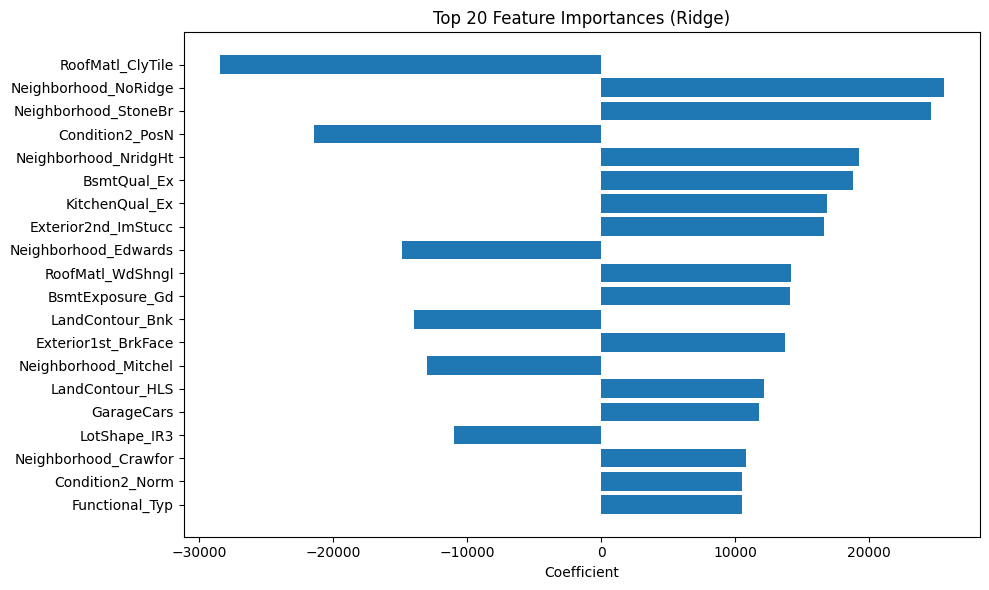

In [5]:
# Ridge Feature Importance
ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
ridge.fit(X_train, y_train)

coef = ridge.coef_
features = X.columns
top_idx = np.argsort(np.abs(coef))[-20:]

plt.figure(figsize=(10, 6))
plt.barh(features[top_idx], coef[top_idx])
plt.title("Top 20 Feature Importances (Ridge)")
plt.xlabel("Coefficient")
plt.tight_layout()
plt.show()
